# Predicting Home Value Using Lasso Regression in Real Estate

You are working as a data scientist for a real estate company that helps home buyers and sellers make data-driven decisions. Your company wants to provide more accurate house price estimates based on key property features like the number of bedrooms, square footage, and age of the house. To achieve this, you've developed a model using Lasso regression to predict house prices.

Problem to Solve:
A client is looking to list their home for sale and wants an accurate estimate of its potential market value. The house is located in a mid-sized city, and its key details are as follows:

 * Number of Bedrooms: 4
 * Square Footage: 2,000 sq ft
 * Age: 10 years
The client is curious about how well your model performs, the factors influencing the predictions, and how they can trust the output compared to actual house sales in the area.

Using the trained Lasso regression model you developed, how would you:

1. Predict the house's selling price using the given features?
2. Present how accurate your predictions are by comparing predicted prices to actual house prices in the market, using performance metrics like Mean Squared Error (MSE) and a comparison chart?
3. Use the scatter plot to explain how well your model performs against actual house prices


In [1]:
print("Hello, Begin Your Data Journey")


Hello, Begin Your Data Journey


In [3]:
!pip3 install sklearn
!pip3 install matplotlib


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error


In [5]:
data = {
    'Bedrooms': [3, 4, 2, 3, 4, 5, 3, 4, 3, 2, 5, 3, 4, 3, 4, 2, 4, 5, 2, 3, 5, 4, 3, 5, 2],
    'Square Footage': [1500, 2400, 1200, 1600, 2200, 3000, 1800, 2500, 1700, 1400, 2800, 1650, 2100, 1550, 2300, 1250, 1950, 2900, 1350, 1600, 2600, 2200, 1650, 2700, 1300],
    'Age': [10, 5, 15, 8, 6, 3, 12, 4, 10, 20, 3, 9, 7, 11, 5, 18, 6, 2, 17, 9, 4, 6, 8, 3, 14],
    'Price': [300000, 450000, 200000, 320000, 430000, 600000, 350000, 470000, 340000, 280000, 570000, 330000, 410000, 320000, 440000, 240000, 380000, 590000, 260000, 330000, 520000, 430000, 310000, 540000, 270000]
}

df = pd.DataFrame(data)


In [6]:
# Extracting features and target variable

X = df[['Bedrooms', 'Square Footage', 'Age']]

Y = df['Price']


In [7]:
#store the predicted price in a variable "predicted_price_new_house"

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


In [8]:
# Initialize the Lasso regression model with regularization strength alpha

# Train the model

lasso = Lasso(alpha=0.1)

# Train the model

lasso.fit(X_scaled, Y)




Lasso(alpha=0.1)

In [9]:
# Get the coefficients (parameters theta & intercept)
# store them in 'theta' and 'intercept' respectively 

theta = lasso.coef_

intercept = lasso.intercept_

theta = np.round(theta, 2)

round(intercept,2)




387200.0

In [10]:
# def get_theta():
#     return                                   # return theta_json here

import json
def get_theta():

    theta_list = theta.tolist()

    theta_json = json.dumps(theta_list)

    return theta_json

In [11]:
theta_json1 = get_theta()
theta_json1


'[25222.29, 95278.87, 10379.51]'

In [12]:
# Make predictions using the trained model

predicted_prices = lasso.predict(X_scaled)


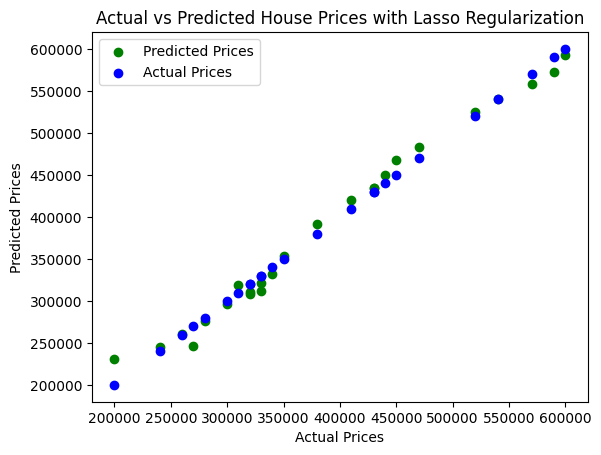

In [13]:
# Scatter plot of actual vs predicted prices

plt.scatter(Y, predicted_prices, color='green', label='Predicted Prices')

plt.scatter(Y, Y, color='blue', label='Actual Prices')

plt.xlabel('Actual Prices')

plt.ylabel('Predicted Prices')

plt.title('Actual vs Predicted House Prices with Lasso Regularization')

plt.legend()

plt.show()


In [14]:
# Calculate and print Mean Squared Error and store it in variable "mse"
# def get_mse(): 
#     return                                  # return mse here
def get_mse():

    mse = mean_squared_error(Y, predicted_prices)

    return mse

In [15]:
mse = get_mse()
mse


150407263.40425608

In [16]:
# Predicting the house price for a new house with specific features (e.g., 4 bedrooms, 2000 sq ft, 10 years old)
new_house = np.array([[4, 2000, 10]])

new_house_scaled = scaler.transform(new_house)

predicted_price_new_house = lasso.predict(new_house_scaled) 



/Users/preetyrai/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
#store the predicted price in a variable "predicted_price_new_house"
round(predicted_price_new_house[0],2)



408514.21